In [1]:
import sys
import os
import re
import glob
import numpy as np
import xml.etree.ElementTree as ET
from PIL import Image
import json
import cv2
from tqdm import trange, tqdm
from scipy.special import kl_div
#os.environ['QT_QPA_PLATFORM'] = 'offscreen'

from pylab import *                           # standard stuff
from scipy.signal import correlate2d          # drift correction
from scipy.ndimage import shift # subpixel image shift
import tifffile  # save 8bit single-channel TIF files
import seaborn as sns
from melcAnalyzer16bit import ProjectOverview

In [2]:
cv2gray = cv2.imread('/data/bionets/datasets/melc/als/MELC Data - processed/ALS01 - 21297/21297_phase.tif', cv2.IMREAD_GRAYSCALE)
pltgray = plt.imread('/data/bionets/datasets/melc/als/MELC Data - processed/ALS01 - 21297/21297_phase.tif')

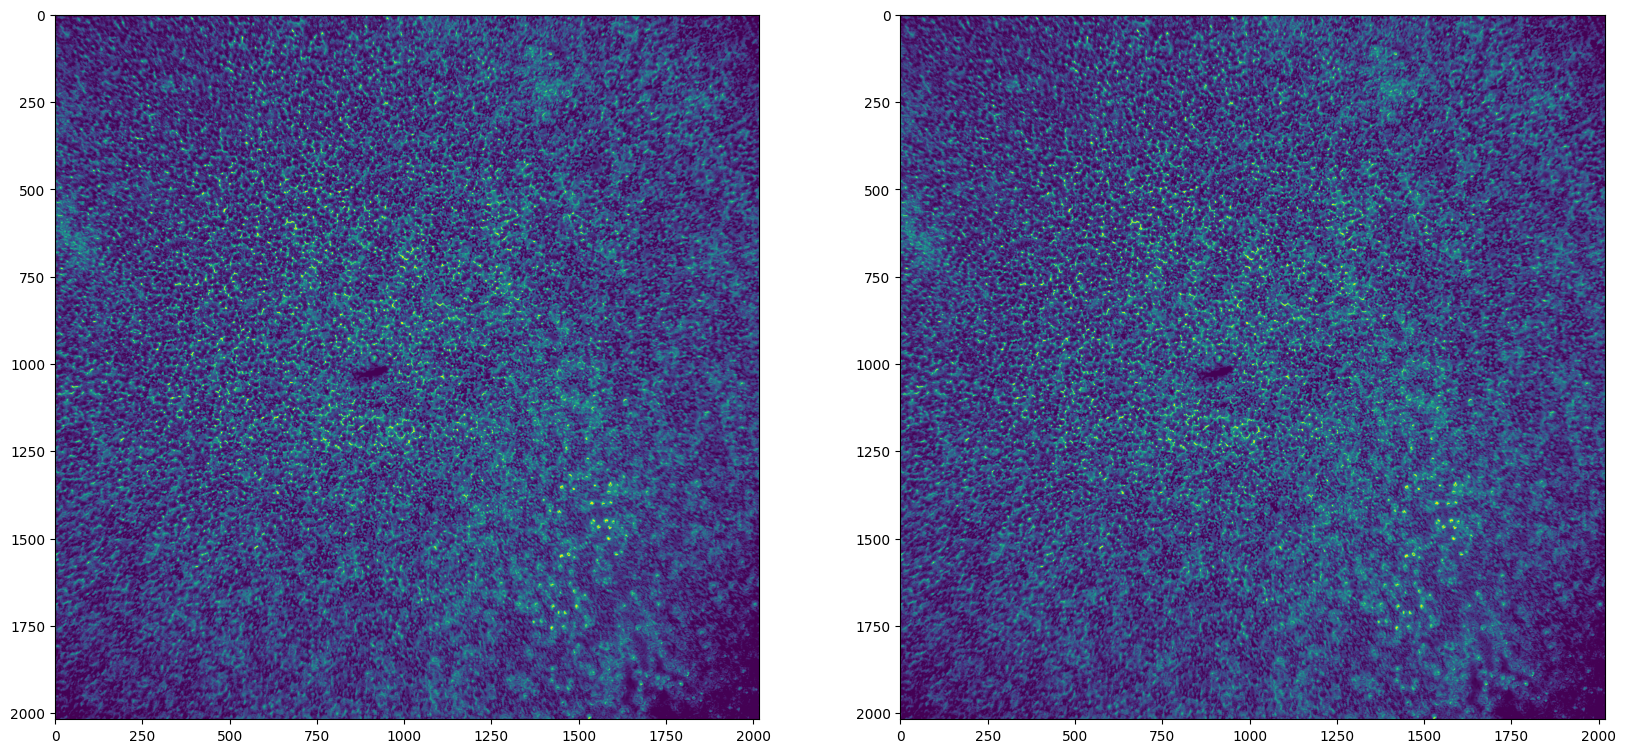

In [26]:
f, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].imshow(cv2gray)
axs[1].imshow(pltgray)
plt.show()

In [27]:
cv2gray == pltgray

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [15]:
testdir = "/data/bionets/je30bery/test_als/21297"
for f in os.listdir(testdir):
    if f == "bleach" or f == "phase":
        continue
    try:
        prev = plt.imread(os.path.join('/data/bionets/datasets/melc/als/MELC Data - processed/ALS01 - 21297/', f), cv2.IMREAD_GRAYSCALE)
        now = plt.imread(os.path.join(testdir, f), cv2.IMREAD_GRAYSCALE)
        print(f, np.unique(prev == now))
    except Exception as e:
        print(f)

21297_phase.tif [ True]
21297_PBS_5000_001.tif [False  True]
21297_PBS_5000_002.tif [False  True]
21297_CD16-PE_5000_003.tif [False  True]
21297_CD4-PE_5000_004.tif [False  True]
21297_CD8-PE_5000_005.tif [False  True]
21297_CD3-PE_5000_006.tif [False  True]
21297_CD7-PE_5000_007.tif [False  True]
21297_CD11b-PE_5000_008.tif [False  True]
21297_CD38-PE_5000_009.tif [False  True]
21297_CD57-PE_5000_010.tif [False  True]
21297_CD26-PE_5000_011.tif [False  True]
21297_CD45RA-PE_5000_012.tif [False  True]
21297_CD45-PE_5000_013.tif [False  True]
21297_HLA-DR-PE_5000_014.tif [False  True]
21297_CD56-PE_5000_015.tif [False  True]
21297_CD36-FITC_5000_017.tif
21297_CD2-FITC_5000_018.tif
21297_CD29-FITC_5000_019.tif
21297_HLA-DQ-FITC_5000_020.tif
21297_NeuN-AF488_5000_021.tif
21297_Propidium iodide_500_023.tif


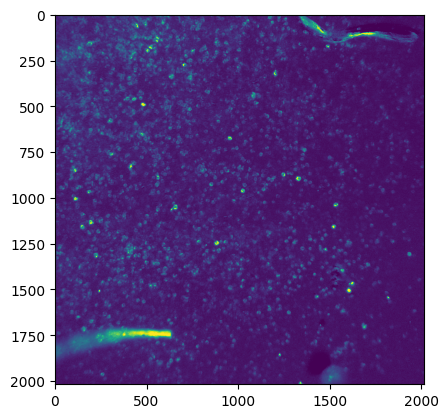

In [16]:
plt.imshow(prev)

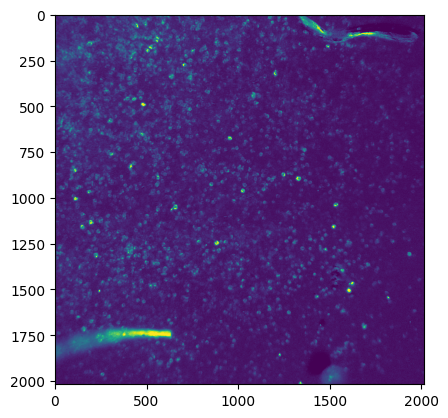

In [17]:
plt.imshow(now)

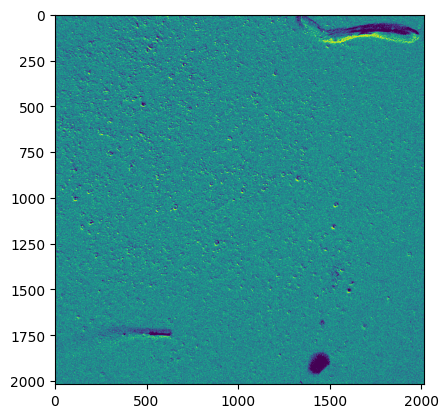

In [18]:
plt.imshow(np.abs(now - prev))

In [8]:
len(np.unique(now))

50776

In [9]:
len(np.unique(prev))

50730

<Axes: ylabel='Count'>

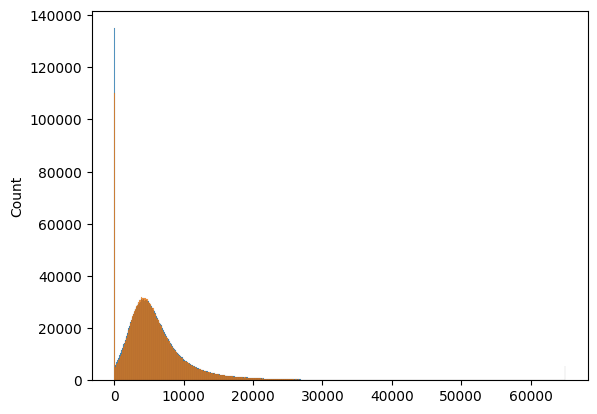

In [10]:
import seaborn as sns
sns.histplot(prev.flatten())
sns.histplot(now.flatten())

In [18]:
previous = cv2.imread('/data/bionets/datasets/melc/als/MELC Data - processed/ALS01 - 21297/21297_phase.tif', cv2.IMREAD_GRAYSCALE)
now = cv2.imread("/data/bionets/je30bery/test_als/21297/21297_phase.tif", cv2.IMREAD_GRAYSCALE)
py2 = cv2.imread("test_py2_phase.tif", cv2.IMREAD_GRAYSCALE)
py3 = cv2.imread("test_py3_phase.tif", cv2.IMREAD_GRAYSCALE)

In [21]:
(now == previous)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

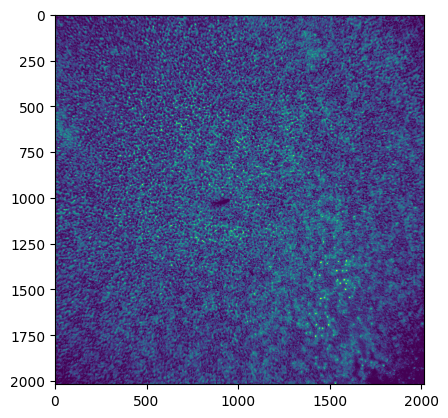

In [14]:
print(np.unique(py2))
plt.imshow(py2)

[  0  36  72 108 145 181 217 253]


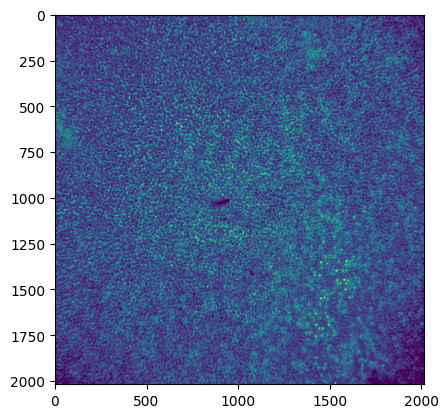

In [15]:
print(np.unique(py3))
plt.imshow(py3)

In [ ]:
print(np.unique(previous))
plt.imshow(previous)

In [12]:
np.unique(previous == py2)

array([ True])

In [164]:
cv2_directly_gray = cv2.imread('/data/bionets/je30bery/test_als/21297/21297_phase.tif', cv2.IMREAD_GRAYSCALE)

rgb_img = cv2.imread('/data/bionets/je30bery/test_als/21297/21297_phase.tif')
gray_pil = Image.fromarray(img).convert('L')
gray_cv2 = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

pil_col = Image.open('/data/bionets/je30bery/test_als/21297/21297_phase.tif')
plt_col = plt.imread('/data/bionets/je30bery/test_als/21297/21297_phase.tif')


In [129]:
f = open('melc_config.json')
config = json.load(f)
mainDir = config["als"]
#mainDir = os.path.join(mainDir, "Eczema")
assert len(mainDir) > 0, 'ERROR: No main directory chosen.'
po = ProjectOverview(mainDir)
po.startProcessing()

### END

Processing {subDir}:   0%|                                                                                                                             | 0/1 [00:00<?, ?it/s]

Data directory /data/bionets/je30bery/test_als/ALS01 - 202301161240_1
+ RunID: 21297
! NOTE: Directory already exists. Overwriting existing results.
+ found calibration images with exposure time 5000.
+ Computed flat-field.



Processing PBS: saved phase contrast image:   0%|                                                                                                     | 0/23 [00:00<?, ?it/s]

(102, 102)
(94, 94)
(102, 102)
(94, 94)
[-4.  -0.1] [-4.  -0.6]
0



Processing PBS: saved phase fluorescence image:   0%|                                                                                                 | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding bleach image:   0%|                                                                                               | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding phase image:   0%|                                                                                                | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding phase image:   4%|███▊                                                                                    | 1/23 [00:14<05:25, 14.80s/it]
Processing PBS with filter FITC:   4%|████▌                                                                                                   | 1/23 [00:14<05:25, 14.80s/it]

7.0
(102, 102)
(94, 94)
(102, 102)
(94, 94)
[-4.  -0.1] [-4.  -0.6]
[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [2 2 3 ... 2 2 2]
 [2 3 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]



Processing PBS: saved phase fluorescence image:   4%|███▊                                                                                     | 1/23 [00:29<05:25, 14.80s/it]
Processing PBS: saved corresponding bleach image:   4%|███▊                                                                                   | 1/23 [00:29<05:25, 14.80s/it]
Processing PBS: saved corresponding phase image:   4%|███▊                                                                                    | 1/23 [00:29<05:25, 14.80s/it]
Processing PBS: saved corresponding phase image:   9%|███████▋                                                                                | 2/23 [00:29<05:08, 14.70s/it]
Processing CD16-PE with filter PE:   9%|████████▊                                                                                             | 2/23 [00:29<05:08, 14.70s/it]

7.0
(102, 102)
(94, 94)



Processing {subDir}:   0%|                                                                                                                             | 0/1 [00:36<?, ?it/s]


KeyboardInterrupt: 

In [165]:
print(np.unique(gray_pil))
print(np.unique(directly_gray))
print(np.unique(gray_cv2))
print(np.unique(pil_col))
print(np.unique(plt_col))

[  0  36  72 108 145 181 217 254]
[  0  36  72 108 145 181 217 254]
[  0  36  72 108 145 181 217 254]
[    0  9289 18578 27867 37157 46446 55735 65025]
[    0  9289 18578 27867 37157 46446 55735 65025]


In [160]:
np.array(pil_col).shape

(2018, 2018)

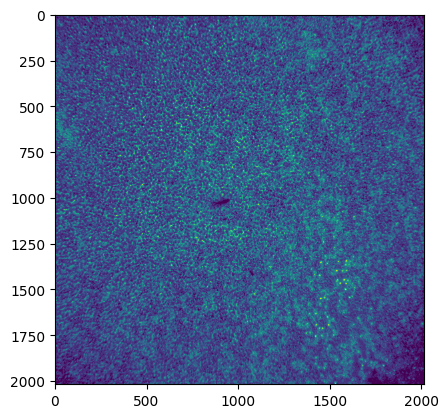

In [159]:
plt.imshow(plt_col)

In [139]:
np.unique(mine1)

array([  0,  36,  72, 108, 145, 181, 217, 254], dtype=uint8)

In [140]:
np.unique(previous)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [117]:
previous = cv2.imread('/data/bionets/datasets/melc/als/MELC Data - processed/ALS01 - 21297/21297_phase.tif', cv2.IMREAD_GRAYSCALE)

In [4]:
d1 = np.histogram(mine1)[0]
d3 = np.histogram(mine2)[0]
d2 = np.histogram(previous)[0]
print(d1)
print(d3)
print(d2)
print(np.sum(kl_div(d1, d2)))
print(np.sum(kl_div(d3, d2)))

[ 186430 1739486 1286699       0  552139  201952       0   69938   24367
   11313]
[ 186430 1739486 1286699       0  552139  201952       0   69938   24367
   11313]
[1169621 1156513  824461  450520  233894  122852   58358   29683   14028
   12394]
1587375.9846300608
1587375.9846300608


NameError: name 'mine' is not defined

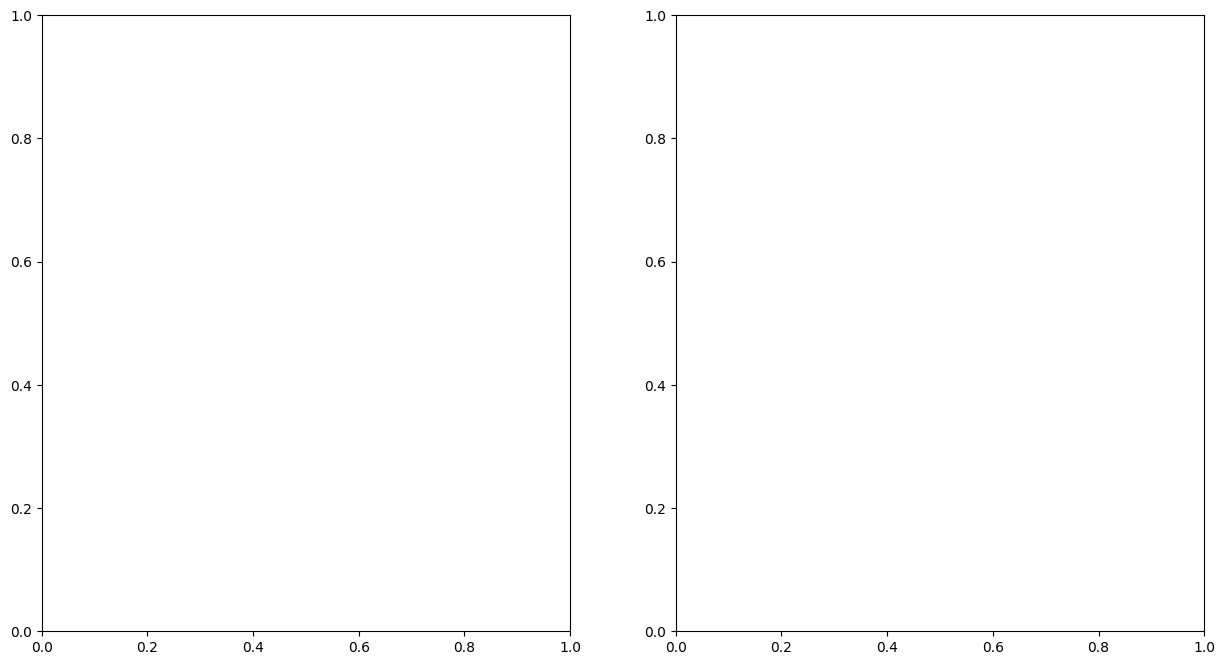

In [5]:
f, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].imshow(mine)
axs[1].imshow(previous)
plt.show()

In [ ]:
plt.imshow(mine!=previous)

In [102]:

class ProjectOverview():
    def __init__(self, mainDir):
        self.mainDir = mainDir
        self.toBeProcessed = []

        ### CHECK FOR UNPROCESSED FIELD-OF-VIEWS
        subDirs = os.listdir(self.mainDir)

        mask = [bool(re.search(r'\d{12}_\d{1}', dir)) for dir in subDirs]  # create a mask for filtering proper sub-dirs
        properSubDirs = [dir for dir, m in zip(subDirs, mask) if m]  # masking without Numpy
        mask = [bool(re.search(r'\d{5}', dir)) for dir in subDirs]  # create a mask for filtering result dirs
        resultIDs = [dir for dir, m in zip(subDirs, mask) if m]
        projects = list(set([dir[:-2] for dir in properSubDirs]))
        
        # list structure for field-of-views
        self.fieldsOfView = []
        self.runIDs = []
        for p in projects:
            l = []
            for d in properSubDirs:
                if d[:-2] == p:
                    l.append(d)
            self.fieldsOfView.append(l)
            self.runIDs.append([])
        # check which field of views have already been processed
        self.isProcessed = []
        for i, p in enumerate(self.fieldsOfView):
            l = []
            for f in p:
                ini_path = os.path.join(mainDir, f, "inifile", "*.xml")
                iniFiles = glob.glob(ini_path)
                assert len(iniFiles) <= 1, "ERROR: Found multiple protocol files (in /inifile)."
                assert len(iniFiles) >= 1, "ERROR: Found no protocol files (in /inifile)."
                protFile = iniFiles[0]

                xmlTree = ET.parse(protFile)
                xmlRoot = xmlTree.getroot()

                # run ID (stored as string)
                runID = [m.attrib for m in xmlRoot.findall('{http://www.meltec.de/2004/xschema}run')][0][
                    '{http://www.w3.org/1999/xlink}href'].split(':')[-1]
                self.runIDs[i].append(runID)

                if runID in resultIDs:
                    l.append(True)
                else:
                    l.append(False)
            self.isProcessed.append(l)    
        
    def import_xml_with_experimental_protocol(self, dirName):# Import XML with experiment protocol
        iniFiles = glob.glob(dirName + '/inifile/*.xml')
        assert len(iniFiles) <= 1, "ERROR: Found multiple protocol files (in /inifile)."
        assert len(iniFiles) >= 1, "ERROR: Found no protocol files (in /inifile)."
        protFile = iniFiles[0]

        xmlTree = ET.parse(protFile)
        xmlRoot = xmlTree.getroot()

        # list of antibodies
        antibodies = [m.get('name') for m in
                        xmlRoot.findall('{http://www.meltec.de/2004/xschema}incStep/' \
                                        '{http://www.meltec.de/2004/xschema}channelStep/' \
                                        '{http://www.meltec.de/2004/xschema}marker')]

        # list of channels
        filters = [m.get('name') for m in
                    xmlRoot.findall('{http://www.meltec.de/2004/xschema}incStep/' \
                                    '{http://www.meltec.de/2004/xschema}channelStep/' \
                                    '{http://www.meltec.de/2004/xschema}fluorescenceFilter')]

        # list of exposure times (stored as string)
        exp_times = [m.text for m in
                        xmlRoot.findall('{http://www.meltec.de/2004/xschema}incStep/' \
                                        '{http://www.meltec.de/2004/xschema}channelStep/' \
                                        '{http://www.meltec.de/2004/xschema}exposureTime')]

        # run ID (stored as string)
        runID = [m.attrib for m in xmlRoot.findall('{http://www.meltec.de/2004/xschema}run')][0][
            '{http://www.w3.org/1999/xlink}href'].split(':')[-1]

        assert len(antibodies) == len(filters), "ERROR: Could not read incubation steps properly."
        assert len(antibodies) == len(exp_times), "ERROR: Could not read incubation steps properly."
        assert len(runID) > 0, "ERROR: Could not read RunID."

        print("+ RunID: %s" % runID)
        return antibodies, filters, exp_times, runID

    # drift correction
    def GetDriftCorrection(self, im1, im2):
        border = int(im1.shape[0] / 4 * 1.90)
        border2 = 4
        factor = 10.


        
        im1b = im1[border:-border, border:-border]
        im2b = im2[border + border2:-border - border2, border + border2:-border - border2]
        
        

        im2_5x = np.array(Image.fromarray(im2b).resize((int(im2b.shape[1] * factor), int(im2b.shape[0] * factor)), Image.BICUBIC))
        im1_5x = np.array(Image.fromarray(im1b).resize((int(im1b.shape[1] * factor), int(im1b.shape[0] * factor)), Image.BICUBIC))
        # im2_5x = imresize(im2b, factor, 'cubic', 'F')
        # im1_5x = imresize(im1b, factor, 'cubic', 'F')
        

                     
        corr = correlate2d(im1_5x, im2_5x, 'valid')
        result = (np.array(divmod(np.argmax(corr), corr.shape[0])) - np.array(
            [border2 * factor, border2 * factor])) / factor 

        if False: 
            f,axs = plt.subplots(4, 2, figsize=(10, 20))

            axs[0,0].imshow(im1)
            axs[0,1].imshow(im2)
            axs[1,0].imshow(im1b)
            axs[1,1].imshow(im2b)
            axs[2,0].imshow(im1_5x)
            axs[2,1].imshow(im2_5x)
            axs[3,0].imshow(corr)
            axs[3,1].imshow(result)
            plt.show()
        return result
        
        
    def ProcessAntibody(self, antibody_name, filter_name, exp_time, dirName, odirName, runID, subDir):
   

        # filter_oname assigns custom (output) filter name if known
        filter_oname = self.filter_otypes[filter_name] if filter_name in self.filter_otypes else filter_name

        filter_index = self.filter_types.index(filter_name)
        pFile = glob.glob(
            dirName + '/source/p_' + antibody_name + "_*_" + "*" + "_*.png")
        oFile = glob.glob(
            dirName + '/source/o_' + antibody_name + "_*" + filter_name + "_*.png")

        pbFile = glob.glob(
            dirName + '/bleach/pb_' + antibody_name + "_*_" + "*" + "_*.png")
        bFile = glob.glob(
            dirName + '/bleach/b_' + antibody_name + "_*" + filter_name + "_*.png")

        if antibody_name == "NONE":
            print("Noooone")
            bIm = cv2.imread(bFile[0], cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15]
            self.bIMRef = bIm
            self.t.set_description(f"Filter switch", refresh=True)
            return
        else:
            self.t.set_description(f"Processing {antibody_name} with filter {filter_oname}", refresh=True)


        pIm = cv2.imread(pFile[0], cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15]
        print(pFile[0])
        print(len(np.unique(pIm)))
        oIm = cv2.imread(oFile[0], cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15]
        pbIm = cv2.imread(pbFile[0], cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15]
        bIm = cv2.imread(bFile[0], cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15]

        bshift = (0, 0)

        # check whether first anti-body is being processed
        if type(self.pIMRef) == type(0):
            print("PIM")
            self.pIMRef = pIm
            # save phase contrast image
            #gray()
            pImCorr = pIm.copy()
            pImCorr = pImCorr - np.percentile(pImCorr, 20. * 0.135)
            pImCorr = pImCorr / np.percentile(pImCorr, 100 - 1. * 0.135)
            pImCorr[pImCorr > 1] = 1

            #tifffile.imsave(odirName + "/" + runID + "_phase.tif", (pImCorr * 255 * 255).astype(np.uint16))
            tifffile.imwrite(odirName + "/" + runID + "_phase.tif", (pImCorr * 255 * 255).astype(np.uint16))
            self.t.set_description(f"Processing {antibody_name}: saved phase contrast image", refresh=True)


        oshift = self.GetDriftCorrection(self.pIMRef, pIm)
        bshift = self.GetDriftCorrection(self.pIMRef, pbIm)
        
   
        if type(self.bIMRef) == type(0):
            self.bIMRef = bIm
            self.old_bshift = np.array([0., 0.])

        # fluorescence = oIm-self.bIMRef
        # fluorescence = shift( oIm*gain_im[filter_index], oshift)-shift( self.bIMRef*gain_im[filter_index], self.old_bshift)
        fluorescence = (shift(oIm, oshift) - shift(self.bIMRef, self.old_bshift)) * self.gain_im[filter_index]
        self.bIMRef = bIm
        #gray()
        fluorescence[fluorescence < 0] = 0
        fluorescence = fluorescence - np.percentile(fluorescence[20:-20, 20:-20], 0.135)
        fluorescence = fluorescence / np.percentile(fluorescence[20:-20, 20:-20], 100 - 0.135)
        fluorescence[fluorescence < 0] = 0
        fluorescence[fluorescence > 1] = 1
        tifffile.imwrite(
            odirName + "/" + runID + "_" + antibody_name + "_" + exp_time + "_" + str(self.counter).zfill(3) + ".tif",
            (fluorescence * 255 * 255).astype(np.uint16))
        self.t.set_description(f"Processing {antibody_name}: saved phase fluorescence image", refresh=True)
    

        bleach = bIm.copy()
        bleach[bleach < 0] = 0
        bleach = bleach - np.percentile(bleach[20:-20, 20:-20], 0.135)
        bleach = bleach / np.percentile(bleach[20:-20, 20:-20], 100 - 0.135)
        bleach[bleach < 0] = 0
        bleach[bleach > 1] = 1
        tifffile.imwrite(
            odirName + "/bleach/" + runID + "_" + antibody_name + "_" + exp_time + "_" + str(self.counter).zfill(
                3) + ".tif", (bleach * 255 * 255).astype(np.uint16))
        self.t.set_description(f"Processing {antibody_name}: saved corresponding bleach image", refresh=True)


        phase = pIm.copy()
        phase[phase < 0] = 0
        phase = phase - np.percentile(phase[20:-20, 20:-20], 20 * 0.135)
        phase = phase / np.percentile(phase[20:-20, 20:-20], 100 - 0.135)
        phase[phase < 0] = 0
        phase[phase > 1] = 1
        tifffile.imwrite(
            odirName + "/phase/" + runID + "_" + antibody_name + "_" + exp_time + "_" + str(self.counter).zfill(
                3) + ".tif", (phase * 255 * 255).astype(np.uint16))
        self.t.set_description(f"Processing {antibody_name}: saved corresponding phase image", refresh=True)


        self.old_bshift = bshift
        self.counter += 1
    
    
    def startProcessing(self):
        self.toBeProcessed = self.fieldsOfView
        self.toBeProcessed = [item for sublist in self.toBeProcessed for item in sublist]  # flatten list
        
        tr = tqdm(self.toBeProcessed, desc=f"Processing", leave=True, position=0)
        
        for subDir in tr:
            tr.set_description("Processing {subDir}", refresh=True)
            # directory containing raw data
            dirName = os.path.join(self.mainDir, subDir)

            assert len(dirName) > 0, "ERROR: Not a valid directory name."
            print("Data directory", dirName)

            antibodies, filters, exp_times, runID = self.import_xml_with_experimental_protocol(dirName)

            # create output-directory, if necessary
            odirName = os.path.join(self.mainDir, runID)
            if not os.path.exists(odirName):
                os.makedirs(odirName)
                print("+ Created output directory", runID)
            else:
                print("! NOTE: Directory already exists. Overwriting existing results.")

            bleach_dir = os.path.join(odirName, "bleach")
            phase_dir = os.path.join(odirName, "phase")
            if not os.path.exists(bleach_dir):
                os.makedirs(bleach_dir)
            if not os.path.exists(phase_dir):
                os.makedirs(phase_dir)

       
            # filter types and custom names
            self.filter_types = np.unique(filters).tolist()
            self.filter_otypes = {'XF111-2': 'PE', 'XF116-2': 'FITC'}

            self.pIMRef = 0
            self.bIMRef = 0
        
            if len(glob.glob(dirName + '/source/o_cal_b*_5000_*_000.png')) > 0:
                print('+ found calibration images with exposure time 5000.')
                brightfield_names = [glob.glob(dirName + '/source/o_cal_b*_5000_' + filt + '_000.png')[0] for filt in
                                     self.filter_types]
                brightfield_im = [cv2.imread(name, cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15] for name in brightfield_names]
                darkframe_names = [glob.glob(dirName + '/source/o_cal_d*_5000_' + filt + '_000.png') for filt in
                                  self.filter_types]
                darkframe_im = [np.mean([cv2.imread(name, cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15] for name in name_list], axis=0) for name_list in
                                darkframe_names]
            else:
                print('! found no calibration images with exposure time 5000.')
                print('! trying to access calibration images with exposure time 2500.')
                brightfield_names = [glob.glob(dirName + '/source/o_cal_b*_2500_' + filt + '_000.png')[0] for filt in
                                     self.filter_types]
                brightfield_im = [cv2.imread(name, cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15] for name in brightfield_names]
                darkframe_names = [glob.glob(dirName + '/source/o_cal_d*_2500_' + filt + '_000.png') for filt in
                                  self.filter_types]
                darkframe_im = [np.mean([cv2.imread(name, cv2.IMREAD_GRAYSCALE)[15:-15, 15:-15] for name in name_list], axis=0) for name_list in
                                darkframe_names]

            corrected_brightfield_im = [(brightfield_im[i] - darkframe_im[i]) for i in
                                        range(len(self.filter_types))]
            mean_corrected_brightfield_im = [np.mean(brightfield_im[i] - darkframe_im[i]) for i in
                                             range(len(self.filter_types))]
            corrected_brightfield_im[0][corrected_brightfield_im[0] <= 0] = mean_corrected_brightfield_im[0]
            corrected_brightfield_im[1][corrected_brightfield_im[1] <= 0] = mean_corrected_brightfield_im[1]

            self.gain_im = [mean_corrected_brightfield_im[i] / corrected_brightfield_im[i] for i in
                       range(len(self.filter_types))]
            self.gain_im[0][self.gain_im[0] < 0] = 0
            self.gain_im[0][self.gain_im[0] > 100] = 100
            self.gain_im[1][self.gain_im[1] < 0] = 0
            self.gain_im[1][self.gain_im[1] > 100] = 100

            print('+ Computed flat-field.')

            self.counter = 1  # put numbers on output files (do not count antibody "NONE")
            self.t = trange(len(antibodies), desc=f"Processing {subDir}", leave=False, position=1)
            for i in self.t:
                self.ProcessAntibody(antibodies[i], filters[i], exp_times[i], dirName, odirName, runID, subDir)

            print("+ Finished RunID " + runID)

        print("### Finished. ###")





In [103]:
def main():
    f = open('melc_config.json')
    config = json.load(f)
    mainDir = config["als"]
    #mainDir = os.path.join(mainDir, "Eczema")
    assert len(mainDir) > 0, 'ERROR: No main directory chosen.'
    po = ProjectOverview(mainDir)
    po.startProcessing()

In [104]:
main()

Processing {subDir}:   0%|                                                                                                                             | 0/1 [00:00<?, ?it/s]

Data directory /data/bionets/je30bery/test_als/ALS01 - 202301161240_1
+ RunID: 21297
! NOTE: Directory already exists. Overwriting existing results.
+ found calibration images with exposure time 5000.
+ Computed flat-field.



Processing PBS with filter PE:   0%|                                                                                                                  | 0/23 [00:00<?, ?it/s]

/data/bionets/je30bery/test_als/ALS01 - 202301161240_1/source/p_PBS_200_XF116-2_001.png
14



Processing PBS: saved phase contrast image:   0%|                                                                                                     | 0/23 [00:00<?, ?it/s]

PIM
[-4.  -0.1] [-4.  -0.6]
0



Processing PBS: saved phase fluorescence image:   0%|                                                                                                 | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding bleach image:   0%|                                                                                               | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding phase image:   0%|                                                                                                | 0/23 [00:14<?, ?it/s]
Processing PBS: saved corresponding phase image:   4%|███▊                                                                                    | 1/23 [00:14<05:24, 14.76s/it]
Processing PBS with filter FITC:   4%|████▌                                                                                                   | 1/23 [00:14<05:24, 14.76s/it]

/data/bionets/je30bery/test_als/ALS01 - 202301161240_1/source/p_PBS_200_XF116-2_001.png
14



Processing {subDir}:   0%|                                                                                                                             | 0/1 [00:28<?, ?it/s]


KeyboardInterrupt: 

In [83]:
c1 = np.array([    288,       0,       0,       0,       0,       0,       0,
        186142,       0,       0,       0,       0,       0,       0,
             0, 1739486,       0,       0,       0,       0,       0,
             0,       0, 1286699,       0,       0,       0,       0,
             0,       0,  552139,       0,       0,       0,       0,
             0,       0,       0,  201952,       0,       0,       0,
             0,       0,       0,       0,   69938,       0,       0,
             0,       0,       0,       0,   24367,       0,       0,
             0,       0,       0,       0,       0,    8132,       0,
             0,       0,       0,       0,       0,       0,    2424,
             0,       0,       0,       0,       0,       0,     605,
             0,       0,       0,       0,       0,       0,       0,
           122,       0,       0,       0,       0,       0,       0,
             0,      27,       0,       0,       0,       0,       0,
             0,       3])


v1l = np.array([ 2.  ,  2.13,  2.26,  2.39,  2.52,  2.65,  2.78,  2.91,  3.04,
        3.17,  3.3 ,  3.43,  3.56,  3.69,  3.82,  3.95,  4.08,  4.21,
        4.34,  4.47,  4.6 ,  4.73,  4.86,  4.99,  5.12,  5.25,  5.38,
        5.51,  5.64,  5.77,  5.9 ,  6.03,  6.16,  6.29,  6.42,  6.55,
        6.68,  6.81,  6.94,  7.07,  7.2 ,  7.33,  7.46,  7.59,  7.72,
        7.85,  7.98,  8.11,  8.24,  8.37,  8.5 ,  8.63,  8.76,  8.89,
        9.02,  9.15,  9.28,  9.41,  9.54,  9.67,  9.8 ,  9.93, 10.06,
       10.19, 10.32, 10.45, 10.58, 10.71, 10.84, 10.97, 11.1 , 11.23,
       11.36, 11.49, 11.62, 11.75, 11.88, 12.01, 12.14, 12.27, 12.4 ,
       12.53, 12.66, 12.79, 12.92, 13.05, 13.18, 13.31, 13.44, 13.57,
       13.7 , 13.83, 13.96, 14.09, 14.22, 14.35, 14.48, 14.61, 14.74,
       14.87, 15.  ])




v1 = np.zeros(len(v1l)-1)
for i in range(len(v1)):
    v1[i] = np.mean([v1l[i:i+2]])
    
c2 = np.array([ 186430,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
       1739486,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
       1286699,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
        552139,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,  201952,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,   69938,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,   24367,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,   11313])

v2l = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])
v2 = np.zeros(len(v2l)-1)
for i in range(len(v2)):
    v2[i] = np.mean([v2l[i:i+2]])
    

c_ori, v_oril = np.histogram(previous, bins=100)
v_oril/=255
v_ori = np.zeros(len(v_oril)-1)
for i in range(len(v_ori)):
    v_ori[i] = np.mean([v_oril[i:i+2]])
    

In [98]:
print(len(np.unique(previous)))

255


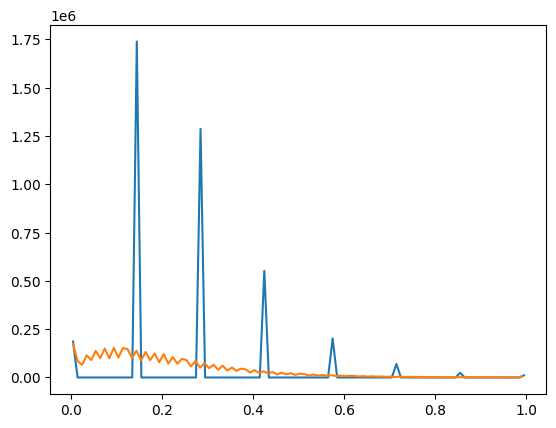

In [97]:
#plt.plot(v1, c1, label="from code before shifting")
plt.plot(v2, c2, label="from code after shifting")
plt.plot(v_ori, c_ori, label="desired result")

In [87]:
np.unique(previous)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [89]:
np.unique(mine1)

array([  0,  36,  72, 108, 145, 181, 217, 254], dtype=uint8)

In [79]:
np.sum(c_ori)

4072324

In [109]:
our_data = cv2.imread("/data/bionets/je30bery/test_als/ALS01 - 202301161240_1/source/p_PBS_200_XF116-2_001.png",cv2.IMREAD_GRAYSCALE)
fau_box_data = cv2.imread("/data/bionets/je30bery/ALS_MELC_Data_Analysis/p_PBS_200_XF116-2_001.png",cv2.IMREAD_GRAYSCALE)

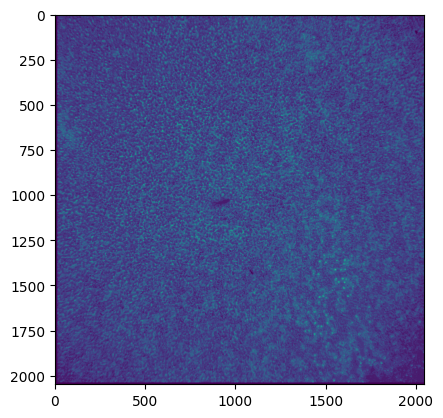

In [110]:
plt.imshow(our_data)

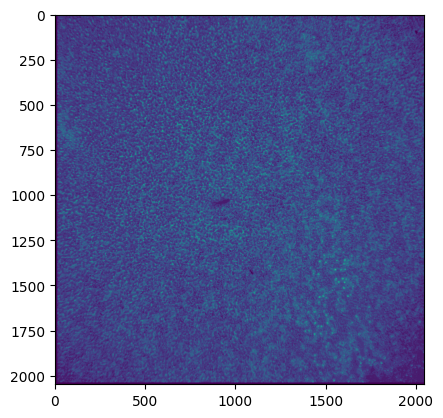

In [111]:
plt.imshow(fau_box_data)

In [112]:
np.unique(fau_box_data)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=uint8)

In [113]:
np.unique(our_data)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=uint8)

In [115]:
our_data==fau_box_data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])